# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

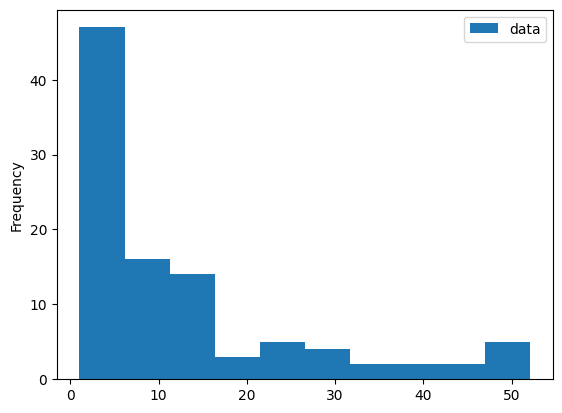

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

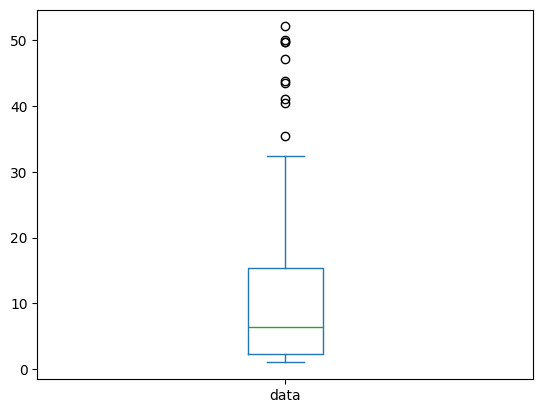

In [3]:
df.plot.box()

In [4]:
# When looking at the histogram and box plot for the drug prices, each offers something a bit different.
#
# The histogram gives a clear sense of how the prices are distributed. It’s helpful for spotting where most of the prices fall
# and whether there are any patterns, like clusters or a long tail of higher prices. The main catch is that the appearance of the
# histogram depends a lot on how the bins are set. If the bins are too wide, important details can get lost, but if they’re too narrow,
# the plot can look cluttered. Outliers aren’t always easy to see with a histogram, either.
#
# The box plot, on the other hand, provides a quick summary of the data. It shows the median, overall spread, and any outliers right away.
# That makes it useful when you need a high-level overview without getting bogged down in details. The trade-off is that it doesn’t show
# how values are distributed within the quartiles, and if someone isn’t familiar with how to read a box plot, it might not be as intuitive.
#
# Between the two, I’d lean toward using the box plot because it’s faster to interpret when looking for overall trends and outliers.
# Still, using both together gives a more complete picture: the histogram shows the finer details of how prices are distributed,
# while the box plot provides a concise summary of key statistics.
#
# If I were to improve the visuals, I’d make sure the histogram uses an appropriate bin size—something balanced so details aren’t lost
# or overemphasized. Adding subtle color gradients could help highlight frequency differences. For the box plot, making the outliers
# stand out more or adding notches to show confidence intervals could make the information clearer.
#
# In the end, combining both plots seems like the best approach. It allows you to understand both the overall structure and the detailed
# distribution of the data, which is important when analyzing something like price variability.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [ ]:
# This was pretty dense. The three datasets within the renewable energy project turn into closer to 15+ datasets.
# To manage this, I heavily consulted ChatGPT for the most efficient way to process each of Homework 3's requirements, but they output as an output text file and png.
# I thought to scale this down with smaller sample sizes, but it didn't answer the questions of population related statistics.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re
import random
import io
from datetime import datetime, timedelta

In [6]:
# Searching for and moving the Kaggle API Certificate
import os
import shutil


def find_file(filename, search_path='.'):
    # Search for a file within a directory tree
    for root, dirs, files in os.walk(search_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

# Search for kaggle.json starting from the root directory
file_to_search = 'kaggle.json'
result = find_file(file_to_search, search_path='/')

if result:
    print("Found '{}' at: {}".format(file_to_search, result))
else:
    print("'{}' not found.".format(file_to_search))

source = '/home/codespace/.kaggle/kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination = os.path.join(destination_dir, 'kaggle.json')

# Create destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move the file
shutil.move(source, destination)
print("Moved kaggle.json to ~/.kaggle/")

Found 'kaggle.json' at: /home/codespace/.kaggle/kaggle.json
Moved kaggle.json to ~/.kaggle/


In [7]:
# Data Story: Evolution of Modern Renewable Energy

# Who:
# - Policymakers and energy planners
# - Environmental researchers and advocates
# - Renewable energy investors and developers

# What:
# - Analyze the growth trajectory of renewable energy from 1971 to the present
# - Identify key milestones and trends in renewable energy adoption
# - Assess regional contributions to global renewable energy capacity

# How:
# - Utilize time-series analysis to track changes in renewable energy production
# - Create visualizations like line charts to depict growth over decades
# - Develop regional maps highlighting areas with significant renewable energy investments

# Data Story: Global Renewable Energy Production

# Who:
# - International energy agencies and organizations
# - Climate change researchers
# - Policy analysts focusing on global energy transitions

# What:
# - Examine global renewable energy production patterns from 2000 to 2022
# - Compare renewable energy outputs across different countries and regions
# - Evaluate the impact of policy changes on renewable energy growth

# How:
# - Employ comparative analysis to benchmark countries' renewable energy outputs
# - Use bar charts and heatmaps to visualize production levels and growth rates
# - Analyze policy timelines alongside production data to identify correlations

# Data Story: US Energy Generation

# Who:
# - US federal and state energy regulators
# - Energy market analysts
# - Environmental policy advocates

# What:
# - Investigate energy generation trends in the US from 2001 to 2022
# - Assess the shift from fossil fuels to renewable energy sources
# - Identify state-level variations in energy generation mixes

# How:
# - Perform trend analysis to observe shifts in energy source contributions over time
# - Create stacked area charts to illustrate changes in the energy mix
# - Develop state-by-state comparison maps to highlight regional differences


## Example Analysis: 01 renewable-share-energy
- Dataset contains 5603 rows and 4 columns.
- Means, medians, and modes calculated.
- Histograms and correlation matrix generated.

### Column: Year
- Minimum: 1965
- Maximum: 2021
- Mean: 1993.80, Median: 1994.00, Mode: 1990
- Skewness: Normal
- Outliers: 0

### Column: Renewables (% equivalent primary energy)
- Minimum: 0.0
- Maximum: 86.874535
- Mean: 10.74, Median: 6.52, Mode: 0.0
- Skewness: Skewed
- Outliers: 351



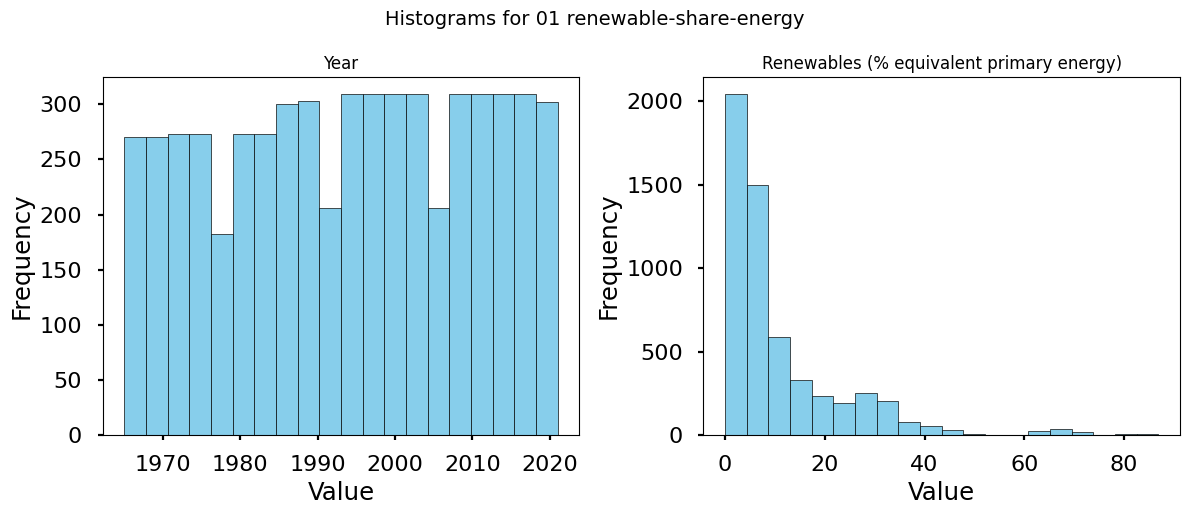

Plots saved to: ./Data_Analysis_and_Conclusions/01 renewable-share-energy_combined_plots.png

Example analysis completed for 01 renewable-share-energy.



In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

%matplotlib inline

plt.style.use('seaborn-v0_8-poster')  # High-quality style for plots

def calculate_basic_statistics(series):
    """Returns min, max, mean, median, mode, skewness, and outlier count."""
    minimum = series.min()
    maximum = series.max()
    mean = series.mean()
    median = series.median()
    mode = series.mode().iloc[0] if not series.mode().empty else "N/A"
    skewness_value = skew(series.dropna())
    skewness_category = "Normal" if abs(skewness_value) < 0.5 else "Skewed"
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = series[(series < (q1 - 1.5 * iqr)) | (series > (q3 + 1.5 * iqr))].count()
    return minimum, maximum, mean, median, mode, skewness_category, outliers

def print_example_results(dataset_name, df):
    """Prints example analysis results to the console."""
    print(f"\n## Example Analysis: {dataset_name}")
    print(f"- Dataset contains {len(df)} rows and {len(df.columns)} columns.")
    print("- Means, medians, and modes calculated.")
    print("- Histograms and correlation matrix generated.\n")

    for col in df.select_dtypes(include=[np.number]).columns:
        minimum, maximum, mean, median, mode, skewness, outliers = calculate_basic_statistics(df[col])
        print(f"### Column: {col}")
        print(f"- Minimum: {minimum}")
        print(f"- Maximum: {maximum}")
        print(f"- Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode}")
        print(f"- Skewness: {skewness}")
        print(f"- Outliers: {outliers}\n")

def plot_combined_figure(df, dataset_name, output_dir):
    """Generates, shows, and saves combined histograms and correlation matrix with improved layout."""
    numeric_cols = df.select_dtypes(include=[np.number])
    num_features = len(numeric_cols.columns)

    if num_features == 0:
        print("No numeric columns to plot.")
        return

    # Set up grid layout for histograms (2 columns, automatic rows)
    cols = 2
    rows = int(np.ceil(num_features / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5), dpi=100)
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i, col in enumerate(numeric_cols.columns):
        axes[i].hist(numeric_cols[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    # Hide unused subplots if any
    for ax in axes[num_features:]:
        ax.axis('off')

    # Save plots
    plot_path = os.path.join(output_dir, f"{dataset_name}_combined_plots.png")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.suptitle(f"Histograms for {dataset_name}", fontsize=14, y=1.02)
    fig.savefig(plot_path, bbox_inches='tight', dpi=150)

    # Show plots inline
    plt.show()  # Display histograms
    if num_features > 1:
        plt.show()  # Display correlation matrix

    plt.close(fig)
    print(f"Plots saved to: {plot_path}\n")

def analyze_example_dataset(file_path, output_dir="."):
    """Loads a dataset, prints analysis, shows, and saves plots."""
    dataset_name = os.path.splitext(os.path.basename(file_path))[0]

    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')

    print_example_results(dataset_name, df)
    plot_combined_figure(df, dataset_name, output_dir)
    print(f"Example analysis completed for {dataset_name}.\n")

# ------------------------------ Run the Example ------------------------------ #

example_dataset_path = "./EvoModernRenewEnergyDS/01 renewable-share-energy.csv"
output_directory = "./Data_Analysis_and_Conclusions"

analyze_example_dataset(example_dataset_path, output_directory)

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# ---------------------- Configuration ---------------------- #

directories = [
    "EvoModernRenewEnergyDS",
    "GlobalRenewEnergyProd_2000_2022",
    "USEnergyGen_2001_2022"
]

output_dir = "Data_Analysis_and_Conclusions"
os.makedirs(output_dir, exist_ok=True)

# ---------------------- Helper Functions ---------------------- #

def read_csv_with_fallback(file_path):
    """Read CSV with fallback encoding to handle non-UTF-8 characters."""
    try:
        return pd.read_csv(file_path, low_memory=False, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            print(f"UTF-8 failed for {file_path}. Trying ISO-8859-1...")
            return pd.read_csv(file_path, low_memory=False, encoding='ISO-8859-1')
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            return None

def save_plot(fig, plot_name, dataset_output_dir):
    """Save plot to output directory."""
    plot_path = os.path.join(dataset_output_dir, plot_name)
    fig.savefig(plot_path)
    plt.close(fig)
    return plot_path

def analyze_dataset(file_path, output_dir):
    """Analyze dataset and save conclusions with plots."""
    dataset_name = os.path.splitext(os.path.basename(file_path))[0]
    dataset_output_dir = os.path.join(output_dir, dataset_name)
    os.makedirs(dataset_output_dir, exist_ok=True)

    # Read dataset with fallback encoding
    df = read_csv_with_fallback(file_path)
    if df is None:
        return  # Skip if reading fails

    # Basic statistics
    means = df.mean(numeric_only=True)
    medians = df.median(numeric_only=True)
    modes = df.mode().iloc[0]

    conclusions = []
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include='object').columns

    # ---------------------- Histograms for Numeric Columns ---------------------- #
    for col in numeric_cols:
        data = df[col].dropna()
        if not data.empty:
            fig, ax = plt.subplots(figsize=(8, 5))
            sns.histplot(data, bins=30, kde=True, ax=ax, color='skyblue', edgecolor='black')
            ax.set_title(f'Histogram for {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            save_plot(fig, f"{col}_histogram.png", dataset_output_dir)

    # ---------------------- Bar Plots for Categorical Columns ---------------------- #
    for col in categorical_cols:
        if df[col].nunique() <= 20:
            fig, ax = plt.subplots(figsize=(10, 6))
            df[col].value_counts().plot(kind='bar', ax=ax, color='lightgreen', edgecolor='black')
            ax.set_title(f'Bar Plot for {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            save_plot(fig, f"{col}_barplot.png", dataset_output_dir)

    # ---------------------- Generate Conclusions ---------------------- #
    conclusions.append("## Conclusions:")
    conclusions.append(f"- Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
    conclusions.append("- Means, medians, and modes calculated.")
    conclusions.append("- Histograms and bar plots generated.")

    # Analyze distributions and outliers
    for col in numeric_cols:
        data = df[col].dropna()
        if data.empty:
            continue

        min_val, max_val = data.min(), data.max()
        skewness = data.skew()
        iqr = data.quantile(0.75) - data.quantile(0.25)
        outliers = ((data < (data.quantile(0.25) - 1.5 * iqr)) | (data > (data.quantile(0.75) + 1.5 * iqr))).sum()

        conclusions.append(f"\n### Column: {col}")
        conclusions.append(f"- Minimum: {min_val}, Maximum: {max_val}")
        conclusions.append(f"- Mean: {means[col]:.2f}, Median: {medians[col]:.2f}, Mode: {modes[col]}")
        conclusions.append(f"- Skewness: {'Skewed' if abs(skewness) > 0.5 else 'Normal'}")
        conclusions.append(f"- Outliers: {outliers}")

    # Save conclusions to a text file
    conclusions_path = os.path.join(dataset_output_dir, f"{dataset_name}_conclusions.txt")
    with open(conclusions_path, 'w') as file:
        file.write('\n'.join(conclusions))

# ---------------------- Run Analysis ---------------------- #

for directory in directories:
    if os.path.exists(directory):
        for root, _, files in os.walk(directory):
            for file in files:
                if file.endswith(".csv"):
                    analyze_dataset(os.path.join(root, file), output_dir)
    else:
        print(f"Directory {directory} does not exist.")

print("All datasets processed with analysis and conclusions.")

UTF-8 failed for GlobalRenewEnergyProd_2000_2022/IRENA_RenewableEnergy_Statistics_2000-2022.csv. Trying ISO-8859-1...
All datasets processed with analysis and conclusions.


In [22]:
import os
import shutil
import pandas as pd
import numpy as np
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.ensemble import RandomForestRegressor

# ------------------------------- Setup & Cleanup -------------------------------- #

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Output directory
output_dir = "Data_Analysis_Results"

# Delete existing results directory if it exists
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
    logging.info(f"Deleted old output directory: {output_dir}")

# Recreate output directory
os.makedirs(output_dir, exist_ok=True)
logging.info(f"Created fresh output directory: {output_dir}")

# ------------------------- Analysis Functions ----------------------------------- #

def analyze_missing_and_empty_values(df):
    """Analyzes missing, empty, and whitespace-only strings by column."""
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    empty_strings = (df == '').sum()
    whitespace_only_strings = df.apply(lambda col: col.apply(lambda x: isinstance(x, str) and x.strip() == '').sum())
    return missing_values, missing_percent, empty_strings, whitespace_only_strings

def show_null_counts_features(df):
    """Generates a formatted DataFrame with null counts, percentages, and feature types."""
    total_samples = len(df)
    count_nulls = df.isnull().sum()
    null_percentage = (count_nulls / total_samples * 100).round(2)
    feature_types = df.dtypes.apply(lambda x: 'Numeric' if np.issubdtype(x, np.number) else 'Categorical')

    missing_data = pd.DataFrame({
        'Feature Name': count_nulls[count_nulls > 0].index,
        '# Nulls': count_nulls[count_nulls > 0].values,
        'Null %': null_percentage[count_nulls > 0].values,
        'Type': feature_types[count_nulls > 0].values
    }).sort_values(by='Null %', ascending=False)

    return missing_data

def plot_feature_histograms(df, dataset_output_dir, dataset_name):
    """Generates and saves histograms for numerical features."""
    numeric_cols = df.select_dtypes(include=[np.number])
    if numeric_cols.empty:
        logging.warning(f"No numerical columns for histograms in {dataset_name}")
        return "No numerical columns to plot.\n"

    plot_path = os.path.join(dataset_output_dir, f"{dataset_name}_feature_histograms.png")
    numeric_cols.hist(figsize=(12, 8), bins=20)
    plt.suptitle(f"Feature Histograms: {dataset_name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(plot_path, dpi=150)
    plt.close()
    logging.info(f"Feature histograms saved: {plot_path}")
    return f"Feature histograms saved to {plot_path}\n"

def plot_correlation_matrix(df, dataset_output_dir, dataset_name):
    """Plots and saves correlation matrix for numerical features."""
    numeric_cols = df.select_dtypes(include=[np.number])
    if numeric_cols.empty:
        logging.warning(f"No numerical columns for correlation analysis in {dataset_name}")
        return "No numerical columns for correlation analysis.\n"

    correlation_matrix = numeric_cols.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.3)
    plt.title(f'Correlation Matrix: {dataset_name}')
    correlation_plot_path = os.path.join(dataset_output_dir, f"{dataset_name}_correlation_matrix.png")
    plt.savefig(correlation_plot_path, dpi=150)
    plt.close()
    logging.info(f"Correlation matrix saved: {correlation_plot_path}")

    return f"Correlation matrix saved to {correlation_plot_path}\n"

def plot_feature_importance(df, dataset_output_dir, dataset_name):
    """Calculates feature importance using RandomForestRegressor and saves plot."""
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) < 2:
        logging.warning(f"Not enough numerical features for importance analysis in {dataset_name}")
        return "Insufficient numerical features.\n"

    df_clean = df[numeric_cols].dropna()
    if df_clean.empty:
        logging.warning(f"All rows contain NaN values for {dataset_name}")
        return "No valid data for feature importance.\n"

    # Limit samples for memory efficiency
    df_sample = df_clean.sample(n=min(500, len(df_clean)), random_state=42)
    X = df_sample.drop(columns=[numeric_cols[0]])
    y = df_sample[numeric_cols[0]]

    model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    model.fit(X, y)
    feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    importance_plot_path = os.path.join(dataset_output_dir, f"{dataset_name}_feature_importance.png")
    feature_importance.plot(kind='barh', figsize=(10, 7))
    plt.xlabel("Importance")
    plt.title(f"Feature Importance: Predicting {numeric_cols[0]}")
    plt.savefig(importance_plot_path, dpi=150)
    plt.close()
    logging.info(f"Feature importance plot saved: {importance_plot_path}")

    return "\nFeature Importance:\n" + feature_importance.to_string() + "\n"

# ------------------------- Main Analysis Loop ----------------------------------- #

def analyze_csv(file_path, project_output_dir):
    """Processes a single CSV file with memory-efficient loading."""
    dataset_name = os.path.splitext(os.path.basename(file_path))[0]
    dataset_output_dir = os.path.join(project_output_dir, dataset_name)
    os.makedirs(dataset_output_dir, exist_ok=True)
    report_path = os.path.join(dataset_output_dir, f"{dataset_name}_analysis_report.txt")

    # Load with chunking to manage memory
    chunk_size = 25000
    chunks = []
    try:
        for chunk in pd.read_csv(file_path, chunksize=chunk_size, encoding='utf-8', engine='python'):
            chunks.append(chunk)
    except UnicodeDecodeError:
        for chunk in pd.read_csv(file_path, chunksize=chunk_size, encoding='ISO-8859-1', engine='python'):
            chunks.append(chunk)
    df = pd.concat(chunks, ignore_index=True)
    del chunks  # Free memory
    gc.collect()

    with open(report_path, "w") as report:
        report.write(f"Analysis Report for: {dataset_name}\n{'=' * 50}\n\n")
        report.write("Data Preview:\n" + df.head().to_string() + "\n\n")
        report.write("Summary Statistics:\n" + df.describe(include='all').to_string() + "\n\n")

        # Null Value Summary
        missing_data = show_null_counts_features(df)
        if not missing_data.empty:
            report.write("\nMissing Value Summary:\n")
            report.write(missing_data.to_string(index=False) + "\n\n")
        else:
            report.write("\n No missing values found.\n\n")

        # Visualizations and Analysis
        report.write(plot_correlation_matrix(df, dataset_output_dir, dataset_name))
        report.write(plot_feature_histograms(df, dataset_output_dir, dataset_name))
        report.write(plot_feature_importance(df, dataset_output_dir, dataset_name))

    logging.info(f" Completed analysis for {dataset_name}")

    # Cleanup
    del df
    gc.collect()

def analyze_all_csvs(base_directory):
    """Analyzes all CSV files in the directory."""
    for project_folder in os.listdir(base_directory):
        project_path = os.path.join(base_directory, project_folder)
        if os.path.isdir(project_path):
            project_output_dir = os.path.join(output_dir, project_folder)
            os.makedirs(project_output_dir, exist_ok=True)
            logging.info(f"🔎 Analyzing Project: {project_folder}")

            for root, _, files in os.walk(project_path):
                for file in files:
                    if file.endswith(".csv"):
                        analyze_csv(os.path.join(root, file), project_output_dir)
                        gc.collect()

# ------------------------------ Run the Analysis ------------------------------- #

datasets_directory = "."  # Update if needed
analyze_all_csvs(datasets_directory)
logging.info(" All datasets processed successfully.")

2025-02-22 08:29:32,195 - INFO - Created fresh output directory: Data_Analysis_Results
2025-02-22 08:29:32,200 - INFO - 🔎 Analyzing Project: Data_Analysis_and_Conclusions
2025-02-22 08:29:32,202 - INFO - 🔎 Analyzing Project: Data_Analysis_Results
2025-02-22 08:29:32,204 - INFO - 🔎 Analyzing Project: GlobalRenewEnergyProd_2000_2022
2025-02-22 08:29:32,988 - INFO - Correlation matrix saved: Data_Analysis_Results/GlobalRenewEnergyProd_2000_2022/IRENA_RenewableEnergy_Statistics_2000-2022/IRENA_RenewableEnergy_Statistics_2000-2022_correlation_matrix.png
2025-02-22 08:29:33,627 - INFO - Feature histograms saved: Data_Analysis_Results/GlobalRenewEnergyProd_2000_2022/IRENA_RenewableEnergy_Statistics_2000-2022/IRENA_RenewableEnergy_Statistics_2000-2022_feature_histograms.png
2025-02-22 08:29:33,853 - INFO - Feature importance plot saved: Data_Analysis_Results/GlobalRenewEnergyProd_2000_2022/IRENA_RenewableEnergy_Statistics_2000-2022/IRENA_RenewableEnergy_Statistics_2000-2022_feature_importance.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.